In [81]:
import numpy as np

import pandas as pd

from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import hvplot.pandas


import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [82]:
cad_jpy_df = pd.read_csv(
    
    Path("D:/git/UTOR-VIRT-FIN-PT-05-2022-U-LOLC/Resources/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
    
)

cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [83]:
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]

cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:xlabel='Date'>

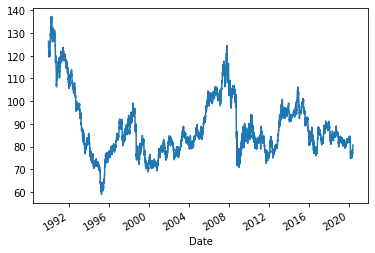

In [84]:
cad_jpy_df['Price'].plot()

In [85]:
import statsmodels.api as sm

cad_jpy_df_noise, cad_jpy_df_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

<AxesSubplot:xlabel='Date'>

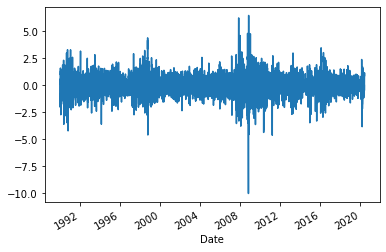

In [86]:
cad_jpy_df_noise.plot()

<AxesSubplot:xlabel='Date'>

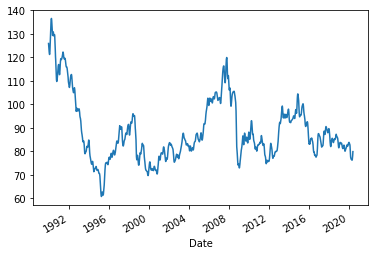

In [87]:
cad_jpy_df_trend.plot()

In [88]:
cad_jpy_df_new = pd.concat([cad_jpy_df['Price'], cad_jpy_df_noise, cad_jpy_df_trend], join="inner", axis=1)

cad_jpy_df_new.head()

,Price,Price_cycle,Price_trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


In [89]:
cad_jpy_df_hp = cad_jpy_df_new.loc["2015-01-01":, :]

cad_jpy_df_hp.head()

,Price,Price_cycle,Price_trend
Date,,,
2015-01-01,103.12,1.523927,101.596073
2015-01-02,102.25,0.945717,101.304283
2015-01-05,101.70,0.708200,100.991800
2015-01-06,100.04,-0.620865,100.660865
2015-01-07,100.93,0.615839,100.314161


In [90]:
cad_jpy_df_new_plot = cad_jpy_df_hp.hvplot.line(x="Date",y=["Price","Price_trend"],label="Price vs Trend")

cad_jpy_df_new_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

Text(0.5, 1.0, 'Noise')

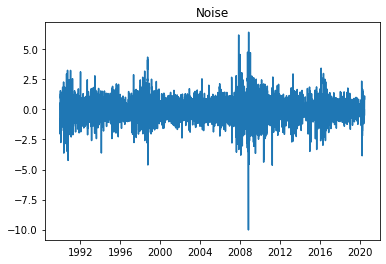

In [91]:
plt.plot(cad_jpy_df_noise)

plt.title("Noise")

In [92]:
returns = (cad_jpy_df[["Price"]].pct_change() * 100)

returns = returns.replace(-np.inf, np.nan).dropna()

returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [93]:
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA

ARIMA_model = ARIMA(cad_jpy_df["Price"], order=(4,1,1)) 

results = ARIMA_model.fit()

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7929
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -8747.114
Date:                Mon, 08 Aug 2022   AIC                          17506.228
Time:                        12:57:49   BIC                          17548.097
Sample:                             0   HQIC                         17520.566
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1438      0.904     -0.159      0.874      -1.915       1.627
ar.L2          0.0019      0.025      0.076      0.940      -0.047       0.051
ar.L3         -0.0089      0.010     -0.918      0.359      -0.028       0.010
ar.L4          0.0066      0.012      0.549      0.583      -0.017       0.030
ma.L1          0.1159      0.904      0.128      0.898      -1.656       1.888
sigma2         0.5319      0.004    118.339      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9210.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'5 Day Returns Forecast'}>

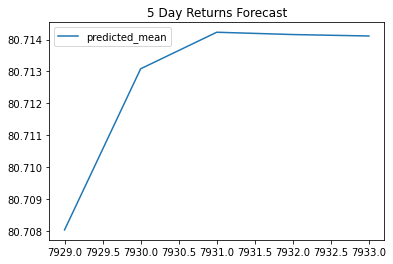

In [95]:
pd.DataFrame(results.forecast(steps=5)).plot(title="5 Day Returns Forecast")

In [106]:
model = ARIMA(returns.values, order=(5,1,1))

results = model.fit()

In [97]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9754.288
Date:                Mon, 08 Aug 2022   AIC                          19522.576
Time:                        12:57:53   BIC                          19571.422
Sample:                             0   HQIC                         19539.303
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0302      0.007     -4.357      0.000      -0.044      -0.017
ar.L2         -0.0025      0.007     -0.366      0.714      -0.016       0.011
ar.L3         -0.0102      0.008     -1.281      0.200      -0.026       0.005
ar.L4          0.0015      0.007      0.209      0.834      -0.012       0.015
ar.L5         -0.0186      0.007     -2.690      0.007      -0.032      -0.005
ma.L1         -1.0000      0.010   -100.710      0.000      -1.019      -0.981
sigma2         0.6851      0.009     72.571      0.000       0.667       0.704
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11614.06
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'5 Day Returns Forecast'}>

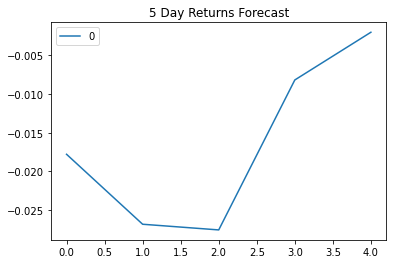

In [98]:
pd.DataFrame(results.forecast(steps=5)).plot(title="5 Day Returns Forecast")

In [99]:
from arch import arch_model

model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46548.40924082976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 306850859.3384427
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.838861417698
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11771.663036006626
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.31072801688
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.369930732108
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.112105819691
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027322298947
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.022077988246
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021067661106
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020797453917
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8911.020764880363
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8911.020764882265
Optimization terminated successfully    (Exit mode 0)
         

In [100]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Mon, Aug 08 2022   Df Residuals:                     7928
Time:                        12:57:54   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [101]:
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [102]:
forecast_horizon = 5

forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

In [103]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)

intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [104]:
final = intermediate.dropna().T

final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


Text(0.5, 1.0, 'GARCH Volatility Forecast')

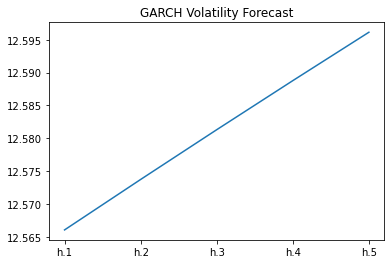

In [105]:
plt.plot(final)

plt.title("GARCH Volatility Forecast")